# Przeprowadzenie testów porównujących działanie sieci konwolucyjnej do sieci MLP

In [1]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

2022-11-22 15:26:19.178421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 15:26:19.292275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-22 15:26:19.292291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-22 15:26:19.315898: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-22 15:26:19.840824: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [3]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "comparing convnet and MLP"
for model_layers in [
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=8, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
    [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=8, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ],
]:
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
    conv_filters = ", ".join([str(x.filters) for x in model_layers if type(x) == layers.Conv2D])
    all_titles.append(f"convnet (Conv [{conv_filters}])")

for model_layers in [
    [
        layers.Flatten(input_shape=input_picture_shape),
        layers.Dense(units=150, activation=ACT_RELU),
        layers.Dense(units=100, activation=ACT_RELU),
        layers.Dense(units=50, activation=ACT_RELU),
        layers.Dense(num_classes, activation='softmax'),
    ],
    [
        layers.Flatten(input_shape=input_picture_shape),
        layers.Dense(units=100, activation=ACT_RELU),
        layers.Dense(units=50, activation=ACT_RELU),
        layers.Dense(num_classes, activation='softmax'),
    ],
    [
        layers.Flatten(input_shape=input_picture_shape),
        layers.Dense(units=50, activation=ACT_RELU),
        layers.Dense(num_classes, activation='softmax'),
    ]
]:
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_descriptions.append(get_layers_info(model_layers))
    dense_neurons = ", ".join([str(x.units) for x in model_layers if type(x) == layers.Dense])
    all_titles.append(f"MLP (Dense [{dense_neurons}])")
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3        Conv2D      64      (3, 3)       relu                        
 5  4  MaxPooling2D                                   (2, 2)  (1, 1)      
 6  5       Flatten                                                       
 7  6         Dense                                                     10,
 0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (2, 2)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense     

In [4]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy", TP, TN, FP, FN])

In [5]:
batch_size = 128
epochs = 5
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 1/5
469/469 [==============================] - 56s 118ms/step - loss: 0.1407 - accuracy: 0.9572 - true_positives: 56760.0000 - true_negatives: 538392.0000 - false_positives: 1608.0000 - false_negatives: 3240.0000 - val_loss: 0.0432 - val_accuracy: 0.9864 - val_true_positives: 9851.0000 - val_true_negatives: 89881.0000 - val_false_positives: 119.0000 - val_false_negatives: 149.0000
Epoch 2/5
469/469 [==============================] - 64s 136ms/step - loss: 0.0456 - accuracy: 0.9863 - true_positives: 59115.0000 - true_negatives: 539262.0000 - false_positives: 738.0000 - false_negatives: 885.0000 - val_loss: 0.0356 - val_accuracy: 0.9882 - val_true_positives: 9871.0000 - val_true_negatives: 89889.0000 - val_false_positives: 111.0000 - val_false_negatives: 129.0000
Epoch 3/5
469/469 [==============================] - 60s 129ms/step - loss: 0.0330 - accuracy: 0.9900 - true_positives: 59369.0000 - true_negatives: 539442.0000 - false_positives: 558.0000 - false_negatives: 631.0000 - val

 14%|█▍        | 1/7 [04:51<29:11, 291.84s/it]

Epoch 1/5
469/469 [==============================] - 15s 31ms/step - loss: 0.2155 - accuracy: 0.9360 - true_positives: 64748.0000 - true_negatives: 627649.0000 - false_positives: 2351.0000 - false_negatives: 5252.0000 - val_loss: 0.0930 - val_accuracy: 0.9697 - val_true_positives: 9666.0000 - val_true_negatives: 89761.0000 - val_false_positives: 239.0000 - val_false_negatives: 334.0000
Epoch 2/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0740 - accuracy: 0.9787 - true_positives: 58540.0000 - true_negatives: 538936.0000 - false_positives: 1064.0000 - false_negatives: 1460.0000 - val_loss: 0.0608 - val_accuracy: 0.9807 - val_true_positives: 9788.0000 - val_true_negatives: 89835.0000 - val_false_positives: 165.0000 - val_false_negatives: 212.0000
Epoch 3/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0553 - accuracy: 0.9841 - true_positives: 58944.0000 - true_negatives: 539163.0000 - false_positives: 837.0000 - false_negatives: 1056.0000 - val

 29%|██▊       | 2/7 [06:03<13:30, 162.05s/it]

Epoch 1/5
469/469 [==============================] - 16s 33ms/step - loss: 0.1871 - accuracy: 0.9434 - true_positives: 65243.0000 - true_negatives: 627925.0000 - false_positives: 2075.0000 - false_negatives: 4757.0000 - val_loss: 0.0669 - val_accuracy: 0.9796 - val_true_positives: 9766.0000 - val_true_negatives: 89833.0000 - val_false_positives: 167.0000 - val_false_negatives: 234.0000
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0643 - accuracy: 0.9807 - true_positives: 58723.0000 - true_negatives: 538984.0000 - false_positives: 1016.0000 - false_negatives: 1277.0000 - val_loss: 0.0464 - val_accuracy: 0.9856 - val_true_positives: 9837.0000 - val_true_negatives: 89877.0000 - val_false_positives: 123.0000 - val_false_negatives: 163.0000
Epoch 3/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0490 - accuracy: 0.9856 - true_positives: 59069.0000 - true_negatives: 539231.0000 - false_positives: 769.0000 - false_negatives: 931.0000 - val_

 43%|████▎     | 3/7 [07:19<08:12, 123.20s/it]

Epoch 1/5
469/469 [==============================] - 7s 15ms/step - loss: 0.3534 - accuracy: 0.8988 - true_positives: 61282.0000 - true_negatives: 626301.0000 - false_positives: 3699.0000 - false_negatives: 8718.0000 - val_loss: 0.1997 - val_accuracy: 0.9426 - val_true_positives: 9318.0000 - val_true_negatives: 89552.0000 - val_false_positives: 448.0000 - val_false_negatives: 682.0000
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1544 - accuracy: 0.9567 - true_positives: 56847.0000 - true_negatives: 537997.0000 - false_positives: 2003.0000 - false_negatives: 3153.0000 - val_loss: 0.1160 - val_accuracy: 0.9666 - val_true_positives: 9596.0000 - val_true_negatives: 89754.0000 - val_false_positives: 246.0000 - val_false_negatives: 404.0000
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0976 - accuracy: 0.9723 - true_positives: 58039.0000 - true_negatives: 538682.0000 - false_positives: 1318.0000 - false_negatives: 1961.0000 - val_l

 57%|█████▋    | 4/7 [07:54<04:24, 88.17s/it] 

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3090 - accuracy: 0.9086 - true_positives: 62160.0000 - true_negatives: 626715.0000 - false_positives: 3285.0000 - false_negatives: 7840.0000 - val_loss: 0.1533 - val_accuracy: 0.9518 - val_true_positives: 9440.0000 - val_true_negatives: 89602.0000 - val_false_positives: 398.0000 - val_false_negatives: 560.0000
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1279 - accuracy: 0.9602 - true_positives: 57293.0000 - true_negatives: 538056.0000 - false_positives: 1944.0000 - false_negatives: 2707.0000 - val_loss: 0.1106 - val_accuracy: 0.9656 - val_true_positives: 9615.0000 - val_true_negatives: 89709.0000 - val_false_positives: 291.0000 - val_false_negatives: 385.0000
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0871 - accuracy: 0.9732 - true_positives: 58177.0000 - true_negatives: 538640.0000 - false_positives: 1360.0000 - false_negatives: 1823.0000 - val_loss

 71%|███████▏  | 5/7 [08:07<02:02, 61.14s/it]

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.3266 - accuracy: 0.9084 - true_positives: 61646.0000 - true_negatives: 626751.0000 - false_positives: 3249.0000 - false_negatives: 8354.0000 - val_loss: 0.1764 - val_accuracy: 0.9484 - val_true_positives: 9372.0000 - val_true_negatives: 89582.0000 - val_false_positives: 418.0000 - val_false_negatives: 628.0000
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1477 - accuracy: 0.9559 - true_positives: 56902.0000 - true_negatives: 537897.0000 - false_positives: 2103.0000 - false_negatives: 3098.0000 - val_loss: 0.1384 - val_accuracy: 0.9592 - val_true_positives: 9536.0000 - val_true_negatives: 89659.0000 - val_false_positives: 341.0000 - val_false_negatives: 464.0000
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1048 - accuracy: 0.9682 - true_positives: 57847.0000 - true_negatives: 538438.0000 - false_positives: 1562.0000 - false_negatives: 2153.0000 - val_loss

 86%|████████▌ | 6/7 [08:18<00:43, 43.94s/it]

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4107 - accuracy: 0.8897 - true_positives: 58972.0000 - true_negatives: 626683.0000 - false_positives: 3317.0000 - false_negatives: 11028.0000 - val_loss: 0.2481 - val_accuracy: 0.9308 - val_true_positives: 9142.0000 - val_true_negatives: 89511.0000 - val_false_positives: 489.0000 - val_false_negatives: 858.0000
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2183 - accuracy: 0.9379 - true_positives: 55474.0000 - true_negatives: 537257.0000 - false_positives: 2743.0000 - false_negatives: 4526.0000 - val_loss: 0.1885 - val_accuracy: 0.9467 - val_true_positives: 9352.0000 - val_true_negatives: 89592.0000 - val_false_positives: 408.0000 - val_false_negatives: 648.0000
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1693 - accuracy: 0.9518 - true_positives: 56523.0000 - true_negatives: 537833.0000 - false_positives: 2167.0000 - false_negatives: 3477.0000 - val_los

100%|██████████| 7/7 [08:24<00:00, 72.14s/it]


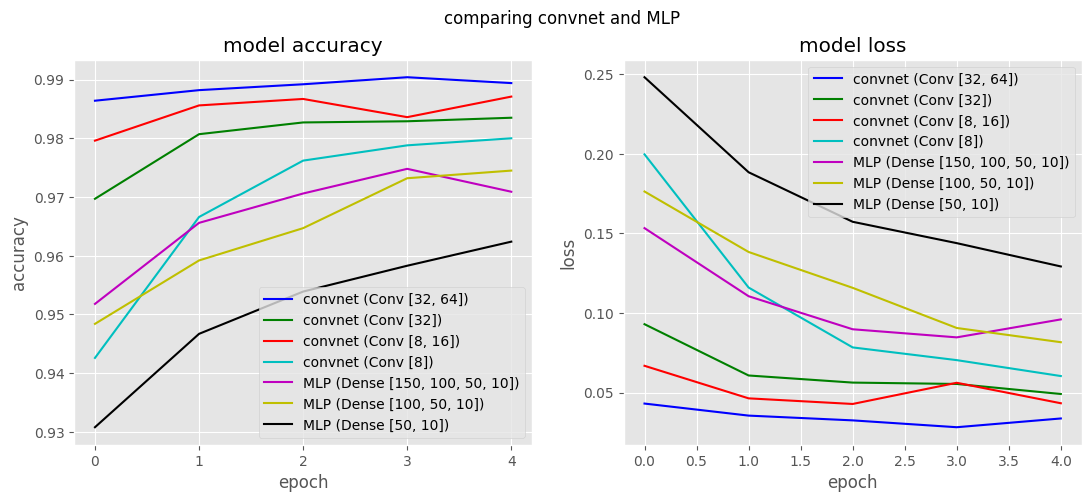

In [6]:
all_title =  f"{changed_param}"
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)

/tmp/ipykernel_18547/1420173061.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


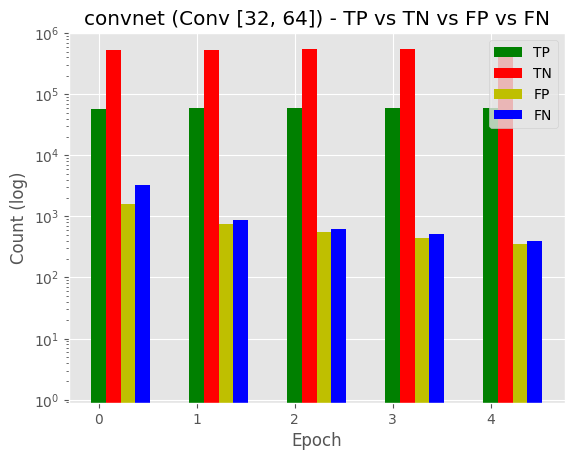

/tmp/ipykernel_18547/1420173061.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


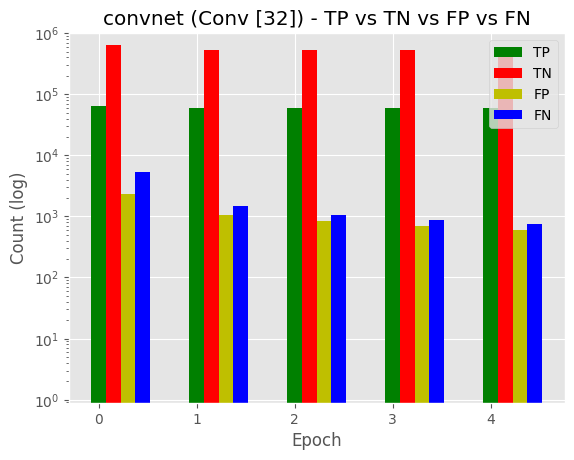

/tmp/ipykernel_18547/1420173061.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


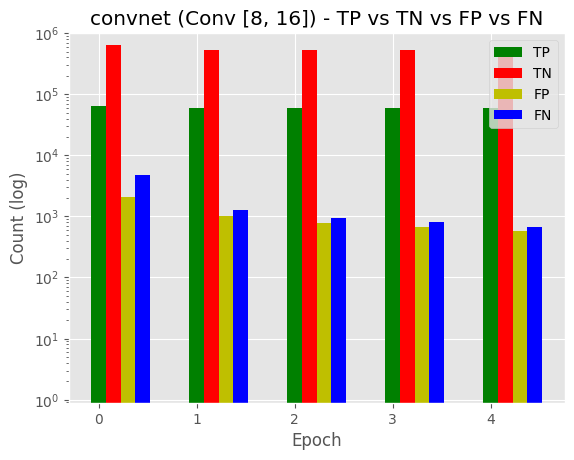

/tmp/ipykernel_18547/1420173061.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


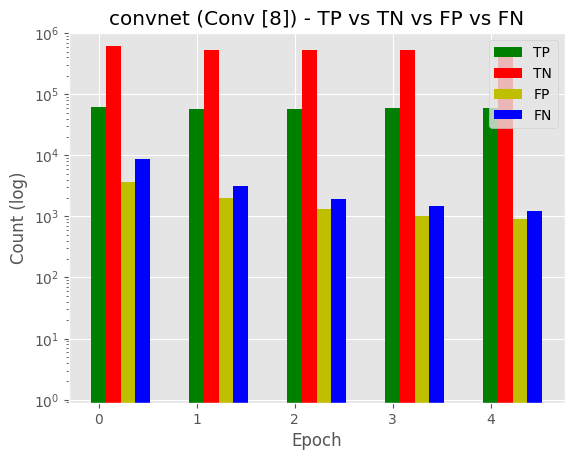

/tmp/ipykernel_18547/1420173061.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


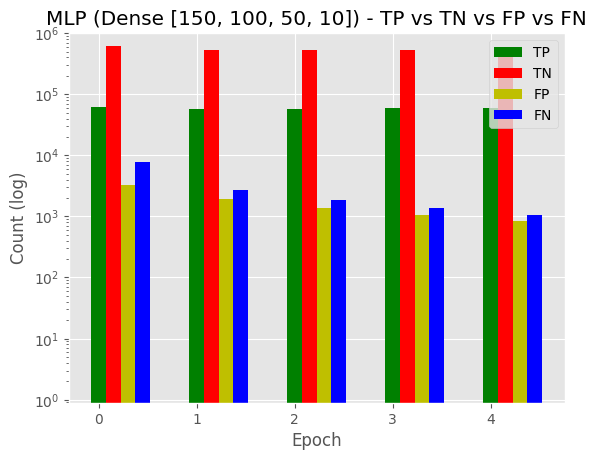

/tmp/ipykernel_18547/1420173061.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


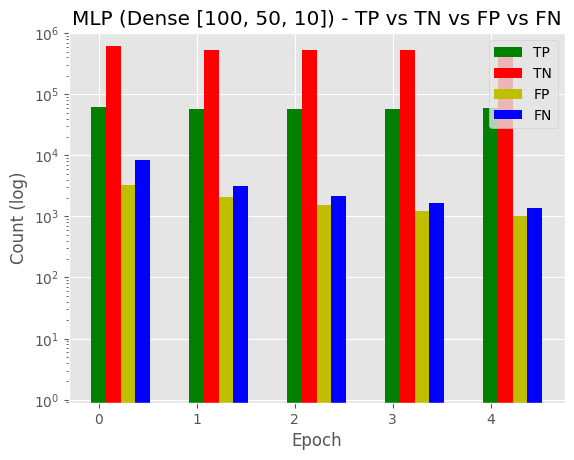

/tmp/ipykernel_18547/1420173061.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)


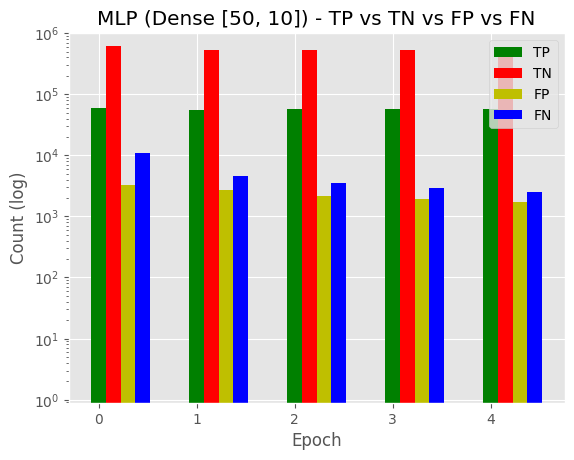

In [7]:
import numpy as np
for i, h in enumerate(all_history):
    plt.style.use('ggplot')
    _, ax = plt.subplots()
    ax.set_yscale("log")
    ind = np.arange(len(h.history["true_negatives"]))
    width = 0.15
    plt.ylim(0, 1e6)
    ax.set_title(all_titles[i] + " - TP vs TN vs FP vs FN")
    ax.bar(ind, np.array(h.history["true_positives"]), width, label="TP", color="g")
    ax.bar(ind+width, np.array(h.history["true_negatives"]), width, label="TN", color="r")
    ax.bar(ind+(width*2), np.array(h.history["false_positives"]), width, label="FP", color="y")
    ax.bar(ind+(width*3), np.array(h.history["false_negatives"]), width, label="FN", color="b")
    ax.legend()
    ax.set_ylabel('Count (log)')
    ax.set_xlabel('Epoch')
    ax.set_xticks(ind)
    plt.show()